<a href="https://colab.research.google.com/github/jclauss24/MLTSA25_JClauss/blob/main/labs/MLTSA_lab_2_20.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [21]:
import pandas as pd
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import numpy as np

In [8]:
# read in the data
consumption_df = pd.read_csv('https://raw.githubusercontent.com/fedhere/MLTSA_FBianco/refs/heads/main/data/consumptionUS.csv')
consumption_df

,year,income,consumption,production,unemployment,savings
0,1970.00,1.026164,0.515488,-2.301594,-24.013389,-12.860000
1,1970.25,1.321423,0.667464,-0.971319,-25.716675,-12.707256
2,1970.50,1.165145,0.102766,-0.392985,-25.743479,-12.752851
3,1970.75,0.502112,-0.132854,-2.179090,-25.396463,-13.277377
4,1971.00,1.880158,1.563505,0.976772,-28.159259,-13.033525
...,...,...,...,...,...,...
181,2015.25,0.742163,0.651337,-0.464605,-28.634280,-12.920307
182,2015.50,0.808291,0.607343,0.128754,-29.523084,-12.973597
183,2015.75,0.697304,0.508611,-0.628269,-28.408732,-12.956514
184,2016.00,0.479744,0.427022,-0.382036,-28.118906,-13.123471


In [10]:
consumption_df.describe() # count tells us the number of valid data points

,year,income,consumption,production,unemployment,savings
count,186.00000,186.000000,186.000000,186.000000,186.000000,186.000000
mean,1993.12500,0.669221,0.713143,0.506816,-28.143260,-13.225574
std,13.45943,0.763883,0.582033,1.441115,1.663795,1.005263
min,1970.00000,-3.320112,-2.037942,-6.551892,-32.354818,-18.113481
25%,1981.56250,0.343154,0.397572,0.120717,-29.066742,-13.617136
50%,1993.12500,0.696175,0.761837,0.694020,-28.478698,-13.171509
75%,2004.68750,1.040326,1.062793,1.311983,-27.561412,-12.788312
max,2016.25000,3.212159,2.027060,3.617150,-21.518999,-9.705503


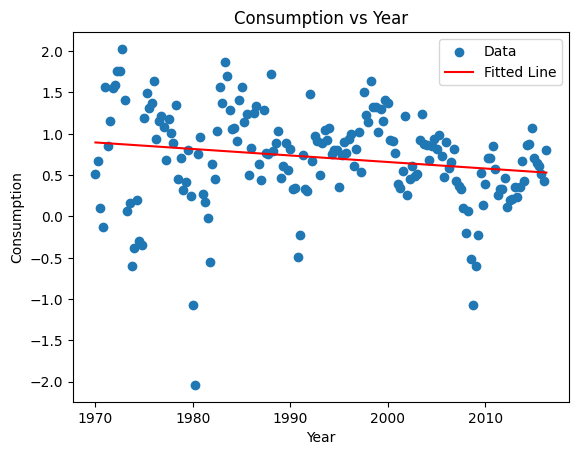

Slope: -0.00788647792174552
Intercept: 16.431879334502522


In [25]:
# prompt: using the dataframe consumption_df fit a line to consumption vs year with sklearn

import matplotlib.pyplot as plt
# Prepare the data
X = consumption_df['year'].values.reshape(-1, 1)  # Reshape to a 2D array
y = consumption_df['consumption']

# Initialize and fit the linear regression model
model = LinearRegression()
model.fit(X, y)

# Get the coefficients (slope and intercept)
slope = model.coef_[0]
intercept = model.intercept_

# Make predictions (optional)
y_pred = model.predict(X)

# Plot the data and the fitted line (optional)
plt.scatter(X, y, label='Data')
plt.plot(X, y_pred, color='red', label='Fitted Line')
plt.xlabel('Year')
plt.ylabel('Consumption')
plt.title('Consumption vs Year')
plt.legend()
plt.show()

print(f"Slope: {slope}")
print(f"Intercept: {intercept}")


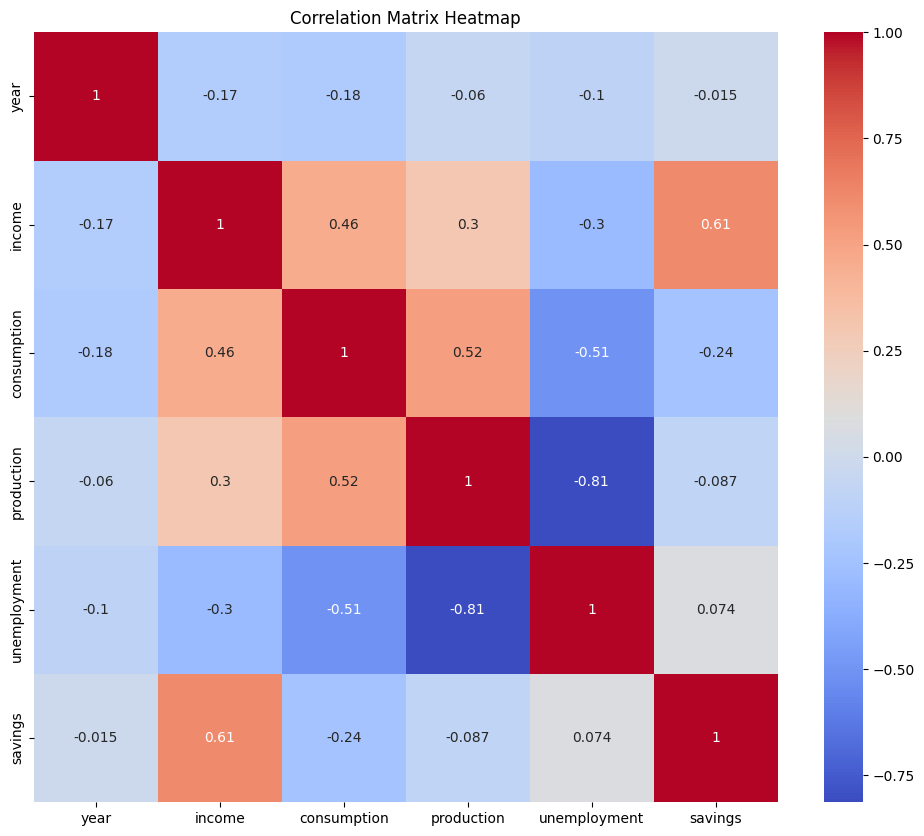

In [19]:
# prompt: show the correlation of all variables with one another as a heat map

import seaborn as sns

plt.figure(figsize=(12, 10))
sns.heatmap(consumption_df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix Heatmap')
plt.show()


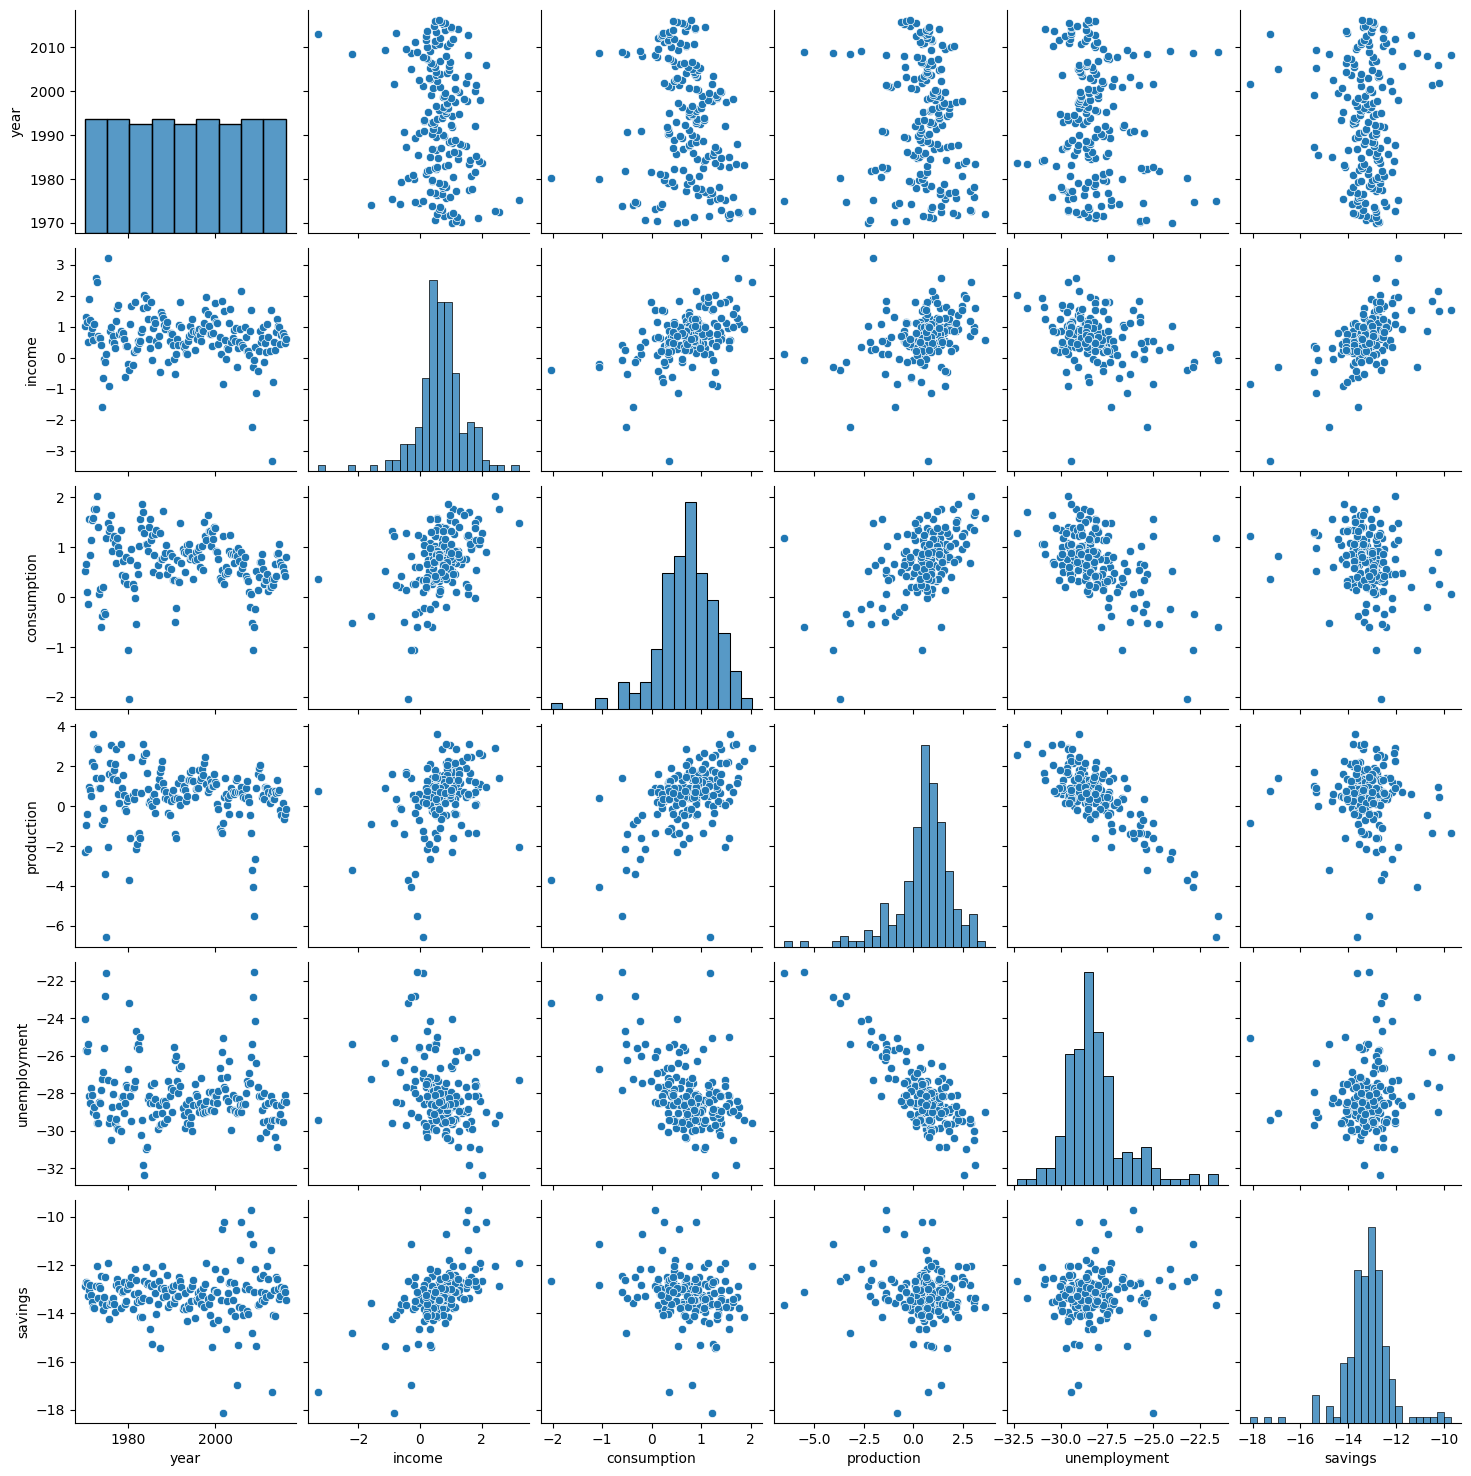

In [18]:
# prompt: show the correlation of all variables with one another with a pair plot

import seaborn as sns

sns.pairplot(consumption_df)
plt.show()


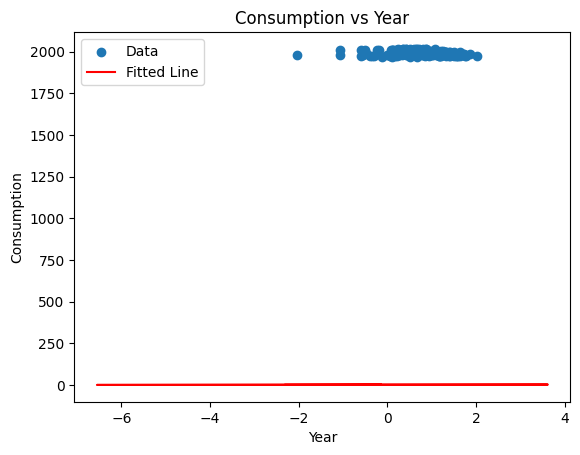

Sum of Squared Errors: 45.81031215255513


In [36]:
# prompt: make a plot of consumption vs production fit with sklearn and plot the result, show the sum of the squared errors

import pandas as pd
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.metrics import mean_squared_error


# Prepare the data
X = consumption_df['production'].values.reshape(-1, 1)  # Reshape to a 2D array
y = consumption_df['consumption']

# Initialize and fit the linear regression model
model = LinearRegression()
model.fit(X, y)

# Make predictions
y_pred = model.predict(X)

# Calculate the sum of squared errors
sse = mean_squared_error(y, y_pred) * len(y)


# Plot the data and the fitted line
plt.scatter(consumption_df['consumption'], consumption_df['year'], label='Data')
plt.plot(X, y_pred, color='red', label='Fitted Line')
plt.xlabel('Year')
plt.ylabel('Consumption')
plt.title('Consumption vs Year')
plt.legend()
plt.show()

print(f"Sum of Squared Errors: {sse}")

# could not get this to give me a plot similar to the one you demonstrated


In [ ]:
consumption_df.columns

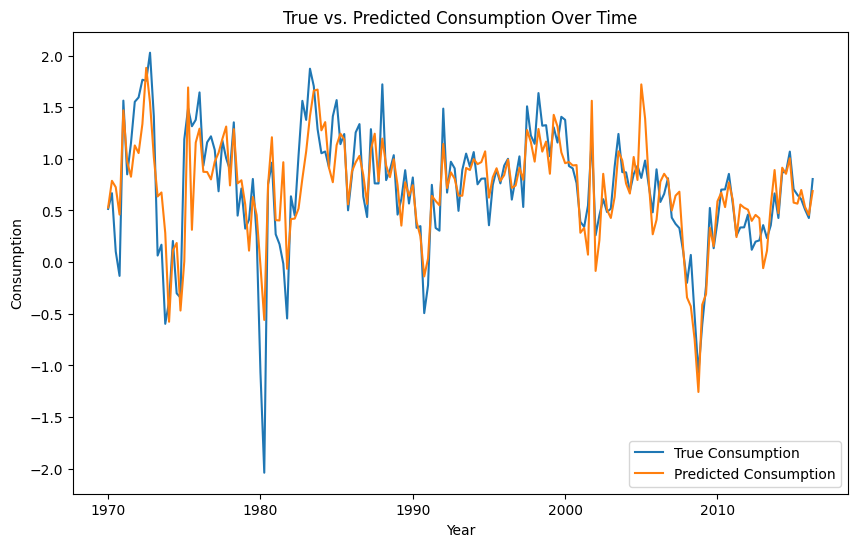

Sum of Squared Errors: 19.777434541058756


In [32]:
# prompt: fit a multilinear model with sklearn to consumption_df predicting consumption and plot the true value of consumption and the prediction over time. also show the sum of squared errors

# Import necessary libraries
import pandas as pd
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import mean_squared_error

# Prepare the data for multilinear regression (assuming 'income' and 'year' are predictors)
if 'income' in consumption_df.columns:
  X = consumption_df[['year', 'income']].values
  y = consumption_df['consumption']

  # Initialize and fit the linear regression model
  model = LinearRegression()
  model.fit(consumption_df.drop('consumption', axis=1), y)

  # Make predictions
  y_pred = model.predict(consumption_df.drop('consumption', axis=1))

  # Calculate the sum of squared errors
  sse = mean_squared_error(y, y_pred) * len(y)

  # Plot the true and predicted values over time
  plt.figure(figsize=(10, 6))
  plt.plot(consumption_df['year'], y, label='True Consumption')
  plt.plot(consumption_df['year'], y_pred, label='Predicted Consumption')
  plt.xlabel('Year')
  plt.ylabel('Consumption')
  plt.title('True vs. Predicted Consumption Over Time')
  plt.legend()
  plt.show()

  print(f"Sum of Squared Errors: {sse}")
else:
  print("Income column not found in DataFrame. Cannot perform multilinear regression.")
